# Exoplanets

An exoplanet is a planet that orbits around stars that are outside our Solar System.

Because planets do not have nuclear fusion like the stars, they don't emit any radiation. Instead, they shine with light reflected from a star. In order to detect them, astronomers have to look at the effects these planets have on the star they orbit.

## Methods

#### Transit Method

A planet passing in front of its star, it is called a transit. When this happens, the planet will block out a tiny part of the star's light. By observing the star during the transit, astronomer can infer some charateristics of the planet, like the size, the distance between the planet form its star, the planet's temperature among others.


When a planet passes in front of its star, it’s called a transit. As the planet transits in front of the star, it blocks out a little bit of the star's light. That means a star will look a little less bright when the planet passes in front of it.
 just the right temperature, it could contain liquid water—an important ingredient for life.

## Habitable Zone

The habitable zone is the region sorrounding the star that it allows the presence of water in its liquid state over the surface of the planet. 

The importance of liquid water to all life on Earth is the reason why astronomers are looking for extraterrestrial life in those planets, based on the hypothesis that we all need water. The first rocky exoplanets in the habitable zone where find through the Kepler's telescope. 

## Looking for life

Humans have observed the universe to understand better our place in it. Searching for exoplanets that are in the habitable zone 

## Data

The data about the exoplanets that is being used in this notebook can be found in:

http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

## Exploratory Data Analysis

In [19]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Reading the file
exoplanet = pd.read_csv("/Users/azucenamv/Documents/MIDS/ML/ids705/assignments/data/phl_hec_all_confirmed_revised.csv",error_bad_lines=False)

In [21]:
# Cleaning data
exoplanet.columns = exoplanet.columns.str.replace('[^a-zA-z]', '')
exoplanet.dropna(inplace=True)
exoplanet.shape

(3632, 34)

In [33]:
exoplanet

,PName,PZoneClass,PMassClass,PCompositionClass,PAtmosphereClass,PHabitableClass,PMassEU,PRadiusEU,PDensityEU,PGravityEU,...,SHabZoneMinAU,SHabZoneMaxAU,PHZD,PHZC,PHZA,PHZI,PHabitable,PConfirmed,PDiscMethod,PDiscYear
1,1SWASP J1407 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,10.94,4.86,53.12,...,0.461,1.143,9.07,15.30,45.41,0.02,0,1,transit,2012
6,2M 0746+20 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,9538.20,10.86,7.44,80.81,...,0.011,0.029,325.42,20.19,132.41,0.00,0,1,imaging,2010
9,2M 2140+16 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,10.30,5.81,59.89,...,0.013,0.035,316.89,14.27,113.50,0.00,0,1,imaging,2010
10,2M 2206-20 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,9538.20,14.56,3.09,44.99,...,0.015,0.041,347.42,27.82,121.07,0.00,0,1,imaging,2010
17,4 Uma b,Hot,Jovian,gas,hydrogen-rich,non-habitable,2257.37,11.67,1.42,16.57,...,8.480,21.034,-2.21,10.03,7.06,0.07,0,1,radial velocity,2007
19,7 CMa b,Warm,Jovian,gas,hydrogen-rich,non-habitable,782.13,11.44,0.52,5.98,...,1.251,3.050,-0.23,7.72,8.73,0.08,0,1,radial velocity,2011
20,8 Umi b,Hot,Jovian,gas,hydrogen-rich,non-habitable,476.91,10.92,0.37,4.00,...,5.496,13.371,-2.27,7.02,2.39,0.11,0,1,radial velocity,2015
21,11 Com b,Hot,Jovian,gas,hydrogen-rich,non-habitable,6168.04,10.98,4.66,51.15,...,10.140,24.781,-2.21,15.07,14.33,0.05,0,1,radial velocity,2008
22,11 Oph b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6676.74,10.87,5.19,56.47,...,0.003,0.009,82422.85,15.68,464.12,0.00,0,1,imaging,2007
23,11 UMi b,Hot,Jovian,gas,hydrogen-rich,non-habitable,3338.37,11.54,2.17,25.05,...,10.921,27.187,-2.15,11.54,10.21,0.06,0,1,radial velocity,2009


In [30]:
# Formating
exoplanet['PDiscMethod'] = exoplanet['PDiscMethod'].str.lower()
exoplanet['PDiscMethod'] = exoplanet['PDiscMethod'].replace('primary transit','transit')

First, let's try to see what is the most popular method of discovering planets.

In [31]:
method = exoplanet.PDiscMethod.value_counts()

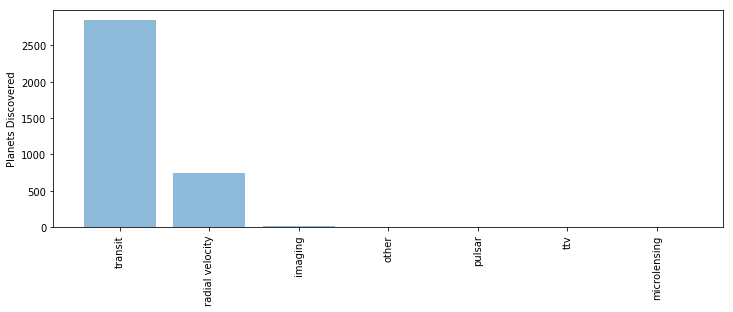

In [37]:
plt.figure(figsize=(12, 4))
plt.bar(method.index, method.values, align='center', alpha=0.5)
plt.xticks(method.index, rotation='vertical')
plt.ylabel('Planets Discovered')
#plt.title('Planets by Year of Updated Date')
plt.show()

We can see that the most popular method is transit and the second one is radial velocity.
Is that method also the most popular among habitable exoplanets?

In [34]:
exoplanet_hab = exoplanet[exoplanet['PHabitableClass']!='non-habitable']
method_hab = exoplanet_hab.PDiscMethod.value_counts()

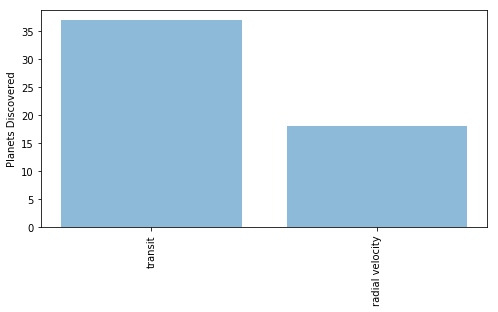

In [41]:
plt.figure(figsize=(8, 4))
plt.bar(method_hab.index, method_hab.values, align='center', alpha=0.5)
plt.xticks(method_hab.index, rotation='vertical')
plt.ylabel('Planets Discovered')
#plt.title('Planets by Year of Updated Date')
plt.show()

Only two methods were able to detect exoplanets: transit and radial velocity. It would be interesting to know why the other two methods have not been able to dectect any of them.

Over the time, it might be more easy for astronomers to find new habitable planets. Let's try to see the trends.

In [43]:
year = exoplanet.PDiscYear.value_counts()
year_hab = exoplanet_hab.PDiscYear.value_counts()

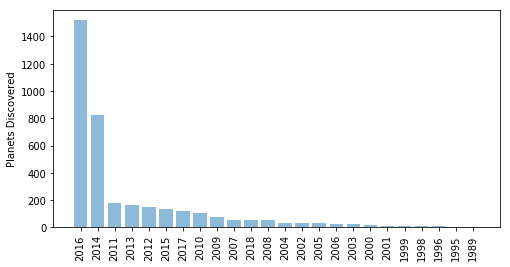

In [45]:
plt.figure(figsize=(8, 4))
plt.bar(year.index, year.values, align='center', alpha=0.5)
plt.xticks(year.index, rotation='vertical')
plt.ylabel('Planets Discovered')
#plt.title('Planets by Year of Updated Date')
plt.show()

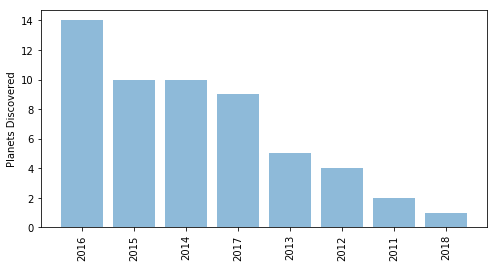

In [44]:
plt.figure(figsize=(8, 4))
plt.bar(year_hab.index, year_hab.values, align='center', alpha=0.5)
plt.xticks(year_hab.index, rotation='vertical')
plt.ylabel('Planets Discovered')
#plt.title('Planets by Year of Updated Date')
plt.show()

Our hypothesis of finding more new planets as time goes by is not completely accurate, but do we some pattern. The most succesful year was 2016. After doing some research, in 2016 NASA discovered more than 1,200 planets. 

Now, let's try to see how are some of the characteristics from the habitable planets compared to the ones that are not.

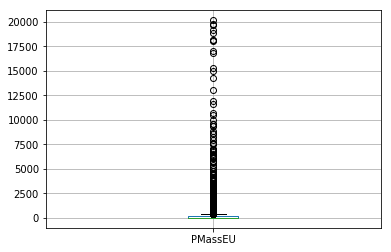

In [47]:
exoplanet.boxplot(column='PMassEU')

AttributeError: Unknown property column

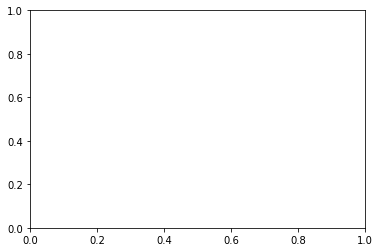

In [58]:
exoplanet.plot.kde(column='PMassEU')

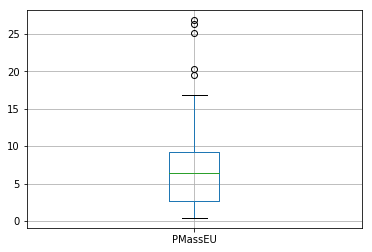

In [48]:
exoplanet_hab.boxplot(column='PMassEU')

In [55]:
exoplanet_hab.PMassEU.quantile([.25, .5,.75])

0.25    2.715
0.50    6.400
0.75    9.245
Name: PMassEU, dtype: float64

In [56]:
exoplanet.PMassEU.quantile([.25, .5,.75])

0.25      3.88
0.50     10.40
0.75    149.43
Name: PMassEU, dtype: float64

We can see that the interquantile for the exoplanets is between 3.88 and 149.43 EU (Earth Units), the median value is 10.4 EU and it has a lot of outliers. If we only look at the habitable exoplanets, its mass is less than 30 EU and the median value is 6.4. From this we can see that exoplanets tend to have more mass than our planet. 

My hypothesis about was that is easier to find larger planets rather than smaller. It seems that the answer is more complicated and intriguing: https://www.forbes.com/sites/startswithabang/2018/03/02/sorry-super-earth-fans-there-are-only-three-classes-of-planet/#7e0aba8d78c4.


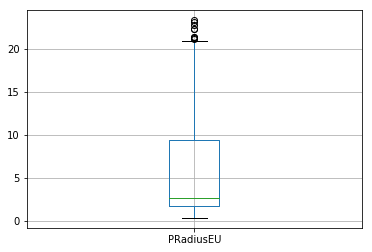

In [59]:
exoplanet.boxplot(column='PRadiusEU')

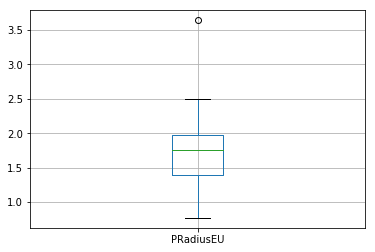

In [60]:
exoplanet_hab.boxplot(column='PRadiusEU')